<a href="https://colab.research.google.com/github/ereinha/SineKAN/blob/main/SineKAN_Model_Weight_Outputs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from sine_kan import *
from sine_kan2 import *
from kan import *

In [ ]:
torch.manual_seed(0)

fig, axes = plt.subplots(1, 3, figsize=(30, 8), dpi=600)
matplotlib.rcParams.update({'font.size': 24})
dims = [2000, 1000, 500, 250, 125]
data = torch.randn((1, 2000))
i = 0
for input, output in zip(dims[:-1], dims[1:]):
    layer = SineKANLayer(input, output, device='cpu')
    data = layer(data)
    axes[0].hist(data.detach().numpy().flatten(), histtype='step', range=(-.15, 0.15), density=1, bins=10, label='layer %d (N=%d)' % (i+1, output))
    i += 1
axes[0].set_xlabel('layer output (a.u.)')
axes[0].set_ylabel('density (a.u.)')
axes[0].set_xlim(-.15, 0.15)
axes[0].legend(framealpha=0.35, fontsize='small', loc='upper left')
axes[0].text(0.95, 0.95, '(a)', transform=axes[0].transAxes, ha='right', va='top', fontsize=36)

matplotlib.rcParams.update({'font.size': 24})
dims = [1000, 1000, 1000, 1000, 1000]
data = torch.randn((1, 1000))
i = 0
for input, output in zip(dims[:-1], dims[1:]):
    layer = SineKANLayer(input, output, device='cpu')
    data = layer(data)
    axes[1].hist(data.detach().numpy().flatten(), histtype='step', range=(-.05, 0.05), density=1, bins=10, label='layer %d (N=%d)' % (i+1, output))
    i += 1
axes[1].set_xlabel('layer output (a.u.)')
axes[1].set_xlim(-.05, 0.05)
axes[1].set_ylabel('density (a.u.)')
axes[1].legend(framealpha=0.35, fontsize='small')
axes[1].text(0.95, 0.95, '(b)', transform=axes[1].transAxes, ha='right', va='top', fontsize=36)


matplotlib.rcParams.update({'font.size': 24})
dims = [1000, 1000, 1000, 1000, 1000]
data = torch.randn((1, 1000))
i = 0
for input, output in zip(dims[:-1], dims[1:]):
    layer = KANLinear(input, output)
    data = layer(data)
    axes[2].hist(data.detach().numpy().flatten(), histtype='step', range=(-1., 1.), density=1, bins=100, label='layer %d (N=%d)' % (i+1, output))
    i += 1
axes[2].set_xlabel('layer output (a.u.)')
axes[2].set_xlim(-1., 1.)
axes[2].set_ylabel('density (a.u.)')
axes[2].legend(framealpha=0.35, fontsize='small', loc='upper left')
axes[2].text(0.95, 0.95, '(c)', transform=axes[2].transAxes, ha='right', va='top', fontsize=36)
plt.savefig('./saved_results/layer_output_sizes.jpg', dpi=600)


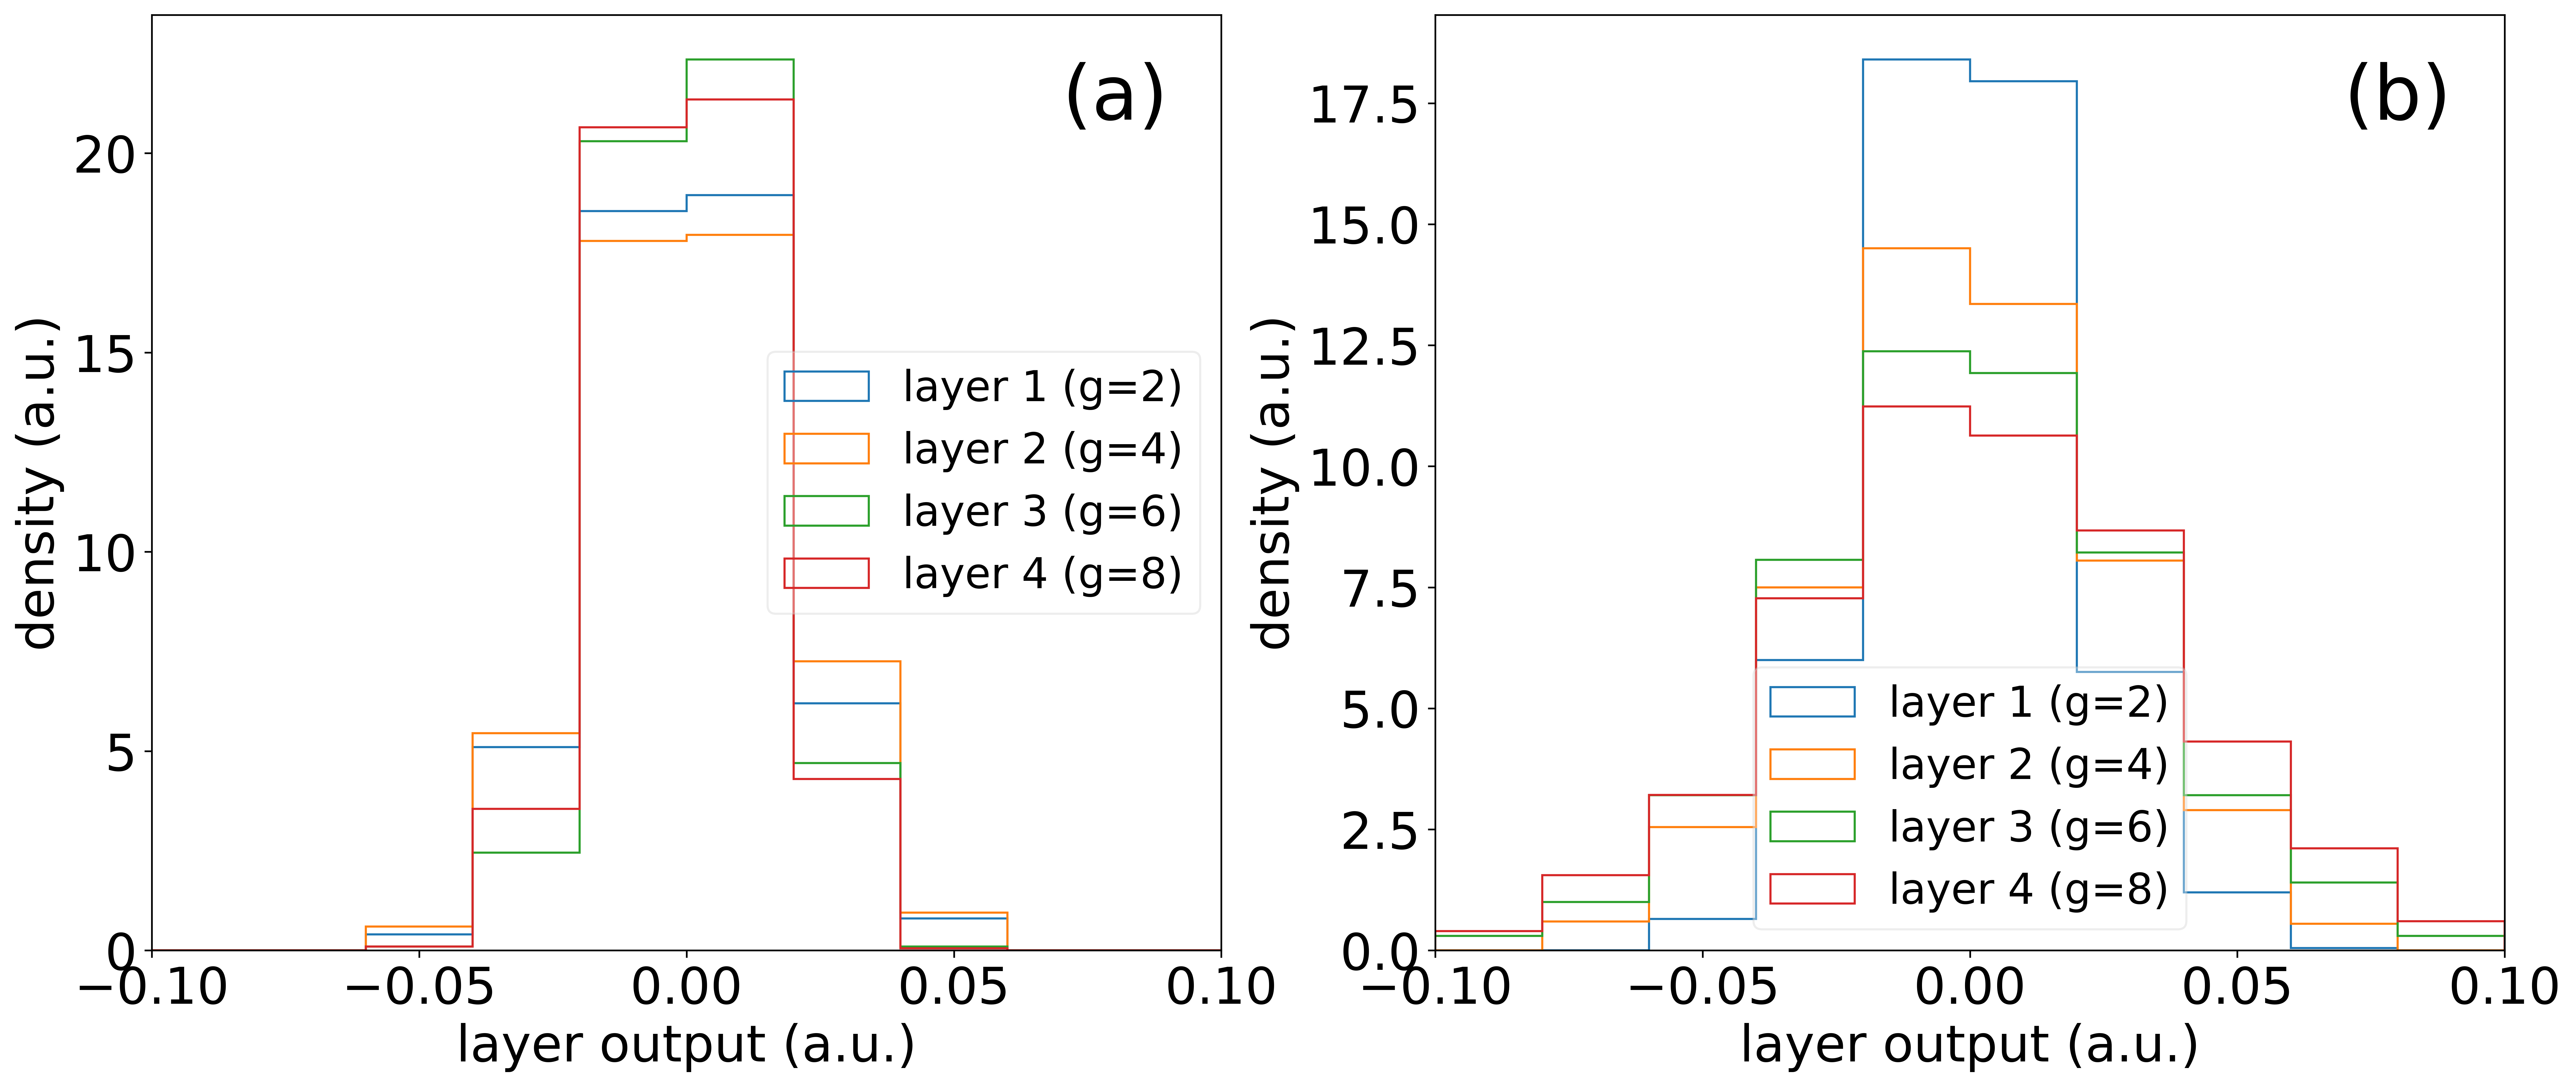

In [ ]:
torch.manual_seed(42)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), dpi=600)
matplotlib.rcParams.update({'font.size': 24})
dims = [1000, 1000, 1000, 1000, 1000]
grid_size = [2, 4, 6, 8]
data = torch.randn((1, 1000))
i = 0
for input, output, g in zip(dims[:-1], dims[1:], grid_size):
    layer = SineKANLayer(input, output, grid_size=g, device='cpu')
    data = layer(data)
    axes[0].hist(data.detach().numpy().flatten(), histtype='step', range=(-.1, 0.1), density=1, bins=10, label='layer %d (g=%d)' % (i+1, g))
    i += 1
axes[0].set_xlabel('layer output (a.u.)')
axes[0].set_ylabel('density (a.u.)')
axes[0].set_xlim(-.1, 0.1)
axes[0].legend(framealpha=0.35, fontsize='small')
axes[0].text(0.95, 0.95, '(a)', transform=axes[0].transAxes, ha='right', va='top', fontsize=36)

dims = [1000, 1000, 1000, 1000, 1000]
grid_size = [2, 4, 6, 8]
data = torch.randn((1, 1000))
i = 0
for input, output, g in zip(dims[:-1], dims[1:], grid_size):
    layer = SineKANLayer2(input, output, grid_size=g, device='cpu')
    data = layer(data)
    axes[1].hist(data.detach().numpy().flatten(), histtype='step', range=(-.1, 0.1), density=1, bins=10, label='layer %d (g=%d)' % (i+1, g))
    i += 1
axes[1].set_xlabel('layer output (a.u.)')
axes[1].set_ylabel('density (a.u.)')
axes[1].set_xlim(-.1, 0.1)
axes[1].legend(framealpha=0.35, fontsize='small', loc='lower center')
axes[1].text(0.95, 0.95, '(b)', transform=axes[1].transAxes, ha='right', va='top', fontsize=36)
plt.savefig('./saved_results/layer_output_grid_size.jpg', dpi=600)
